# amazon

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval

In [2]:
def get_results(exp, path):
    cols = ['gain']
#     cols = our_cols if exp.startswith('Ours') else all_cols
    df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
    results = pd.DataFrame()
    for col in cols:
        results[col] = pd.Series(df.loc[0,col])
    return results

paths = {
    'Lgbm' :"lgbm/lgbm_vanilla.csv",
    'Catboost' :"catboost/catboost_vanilla.csv",
    "Ours_kfold" :"ours_Kfold/ours_kfold__.csv",
     "Ours_Vanilla" :"ours_vanilla/ours_vanilla__.csv",
    "Sklearn_MeanImputing" : "sklearn/sklearn_mean_imputing.csv",
#     "Slearn_OneHot" : "sklearn/sklearn_one_hot.csv",
    'Xgboost_MeanImputing': "xgboost/xgboost_mean_imputing.csv",
#     'Xgboost_OneHot': "xgboost/xgboost_one_hot.csv"
}

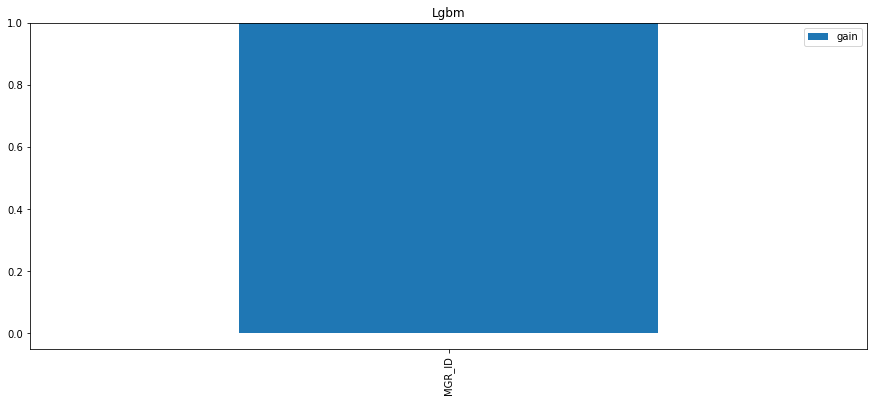

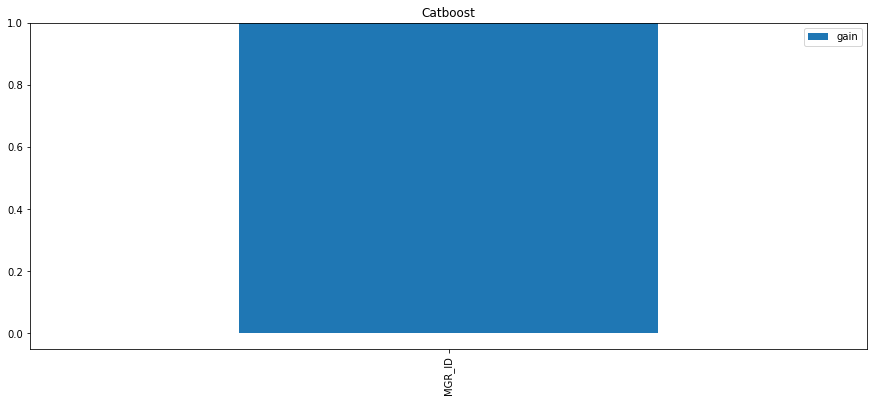

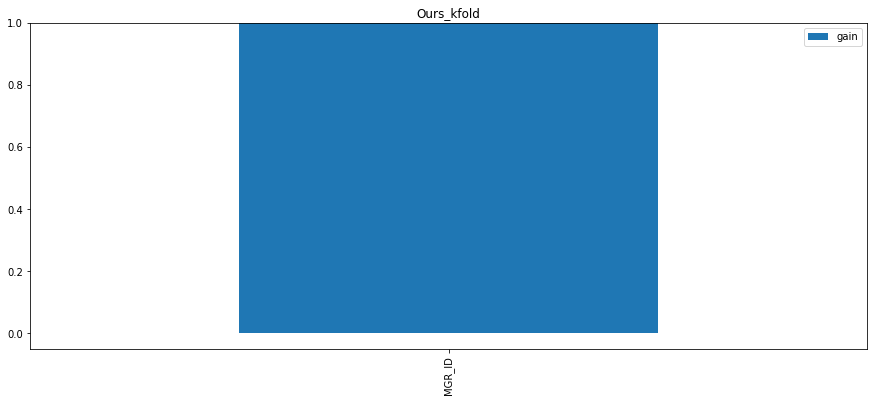

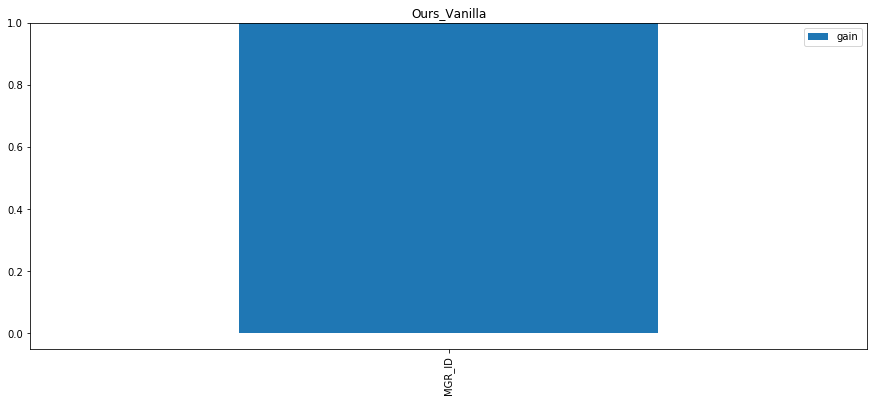

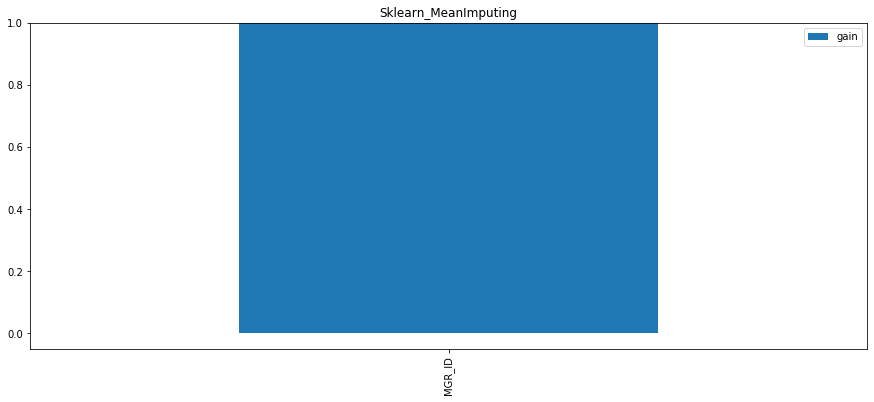

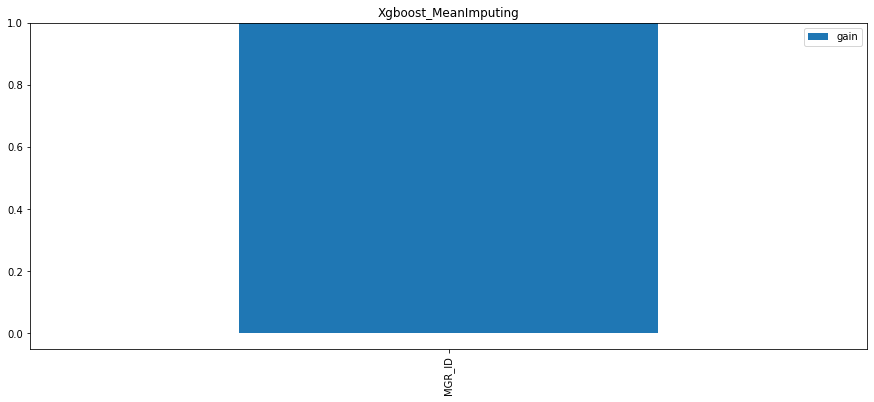

In [3]:
for k, v in paths.items():
    results = get_results(k,v)
    results = results.sort_index()
#         results = results[['gain', 'permutation_train','permutation_test']]
    results.plot(kind = 'bar', figsize = (15,6), title = k, ylim = (-0.05,1))
    plt.plot()
#     except:
#         pass

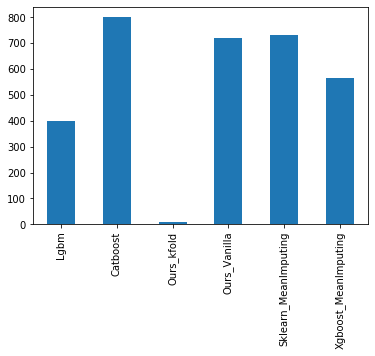

In [4]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['nleaves'][0]
pd.Series(results).plot(kind = 'bar')

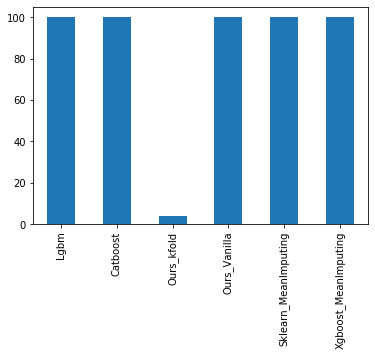

In [5]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['ntrees'][0]
pd.Series(results).plot(kind = 'bar')

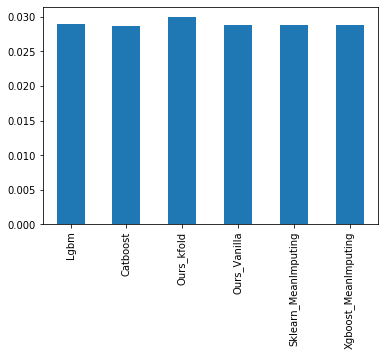

In [6]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['error'][0]
pd.Series(results).plot(kind = 'bar')

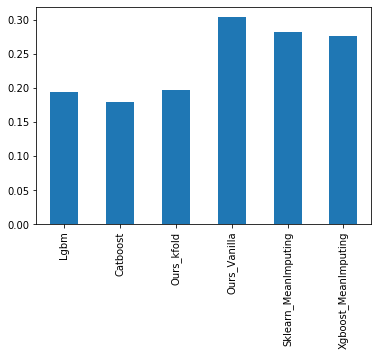

In [7]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['logloss'][0]
pd.Series(results).plot(kind = 'bar')

In [8]:
pd.Series(results)

Lgbm                    0.193910
Catboost                0.179140
Ours_kfold              0.196654
Ours_Vanilla            0.303439
Sklearn_MeanImputing    0.281173
Xgboost_MeanImputing    0.275971
dtype: float64